# Fourier Transform is used to anlyze the frequency of the image

In [27]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import cv2 

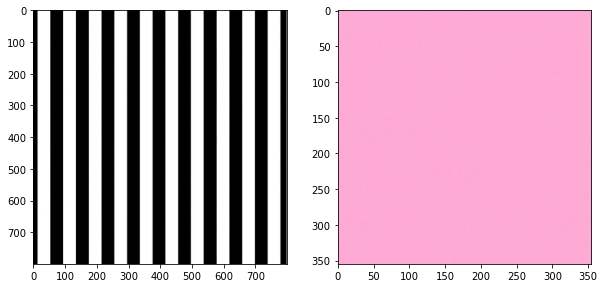

In [28]:
image_stripes = cv2.imread('images/stripes.jpg')
image_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_BGR2RGB)


image_pink = cv2.imread('images/pink_solid.jpg')
image_pink = cv2.cvtColor(image_pink, cv2.COLOR_BGR2RGB)

#Displaying Images

f,(ax1,ax2) = plt.subplots(1,2,figsize = (10,5))
ax1.imshow(image_stripes)
ax2.imshow(image_pink)

## Converting the image into frequency domain

In [29]:
# Converting the images into the RGB format
gray_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_RGB2GRAY)
gray_pinks = cv2.cvtColor(image_pink, cv2.COLOR_RGB2GRAY)

#Normalize the image
normalize_stripes = gray_stripes/255
normalize_pinks = gray_pinks/255

In [23]:
# Writing a function that will create a Frequency Domain of the input images

def fft_image(norm_image):
    f = np.fft.fft2(norm_image) # will convert the image into Fast Fourier Tranform 
    fshift = np.fft.fftshift(f) # to shift the lowfrequency at centre
    frequeny_specturm = 20*np.log(np.abs(fshift))
    
    return frequeny_specturm  

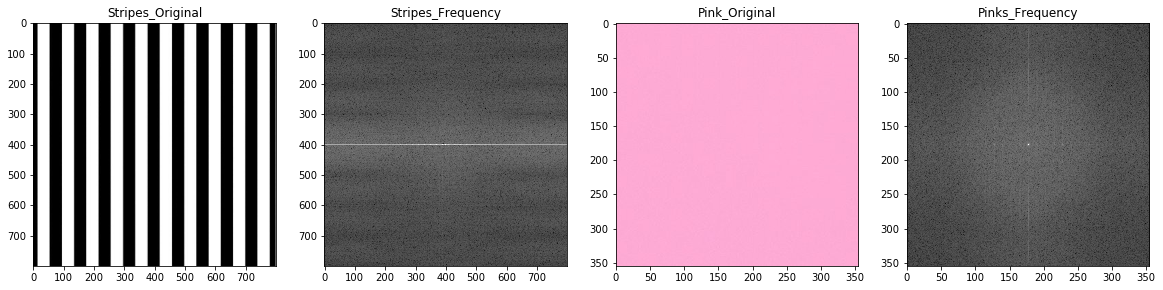

In [30]:
# call the fft function over Normalize Images
f_stripes = fft_image(normalize_stripes)
f_pinks = fft_image(normalize_pinks)

# image_combined_stripes = np.concatenate((image_stripes,f_stripes), axis = 1)
# # # cv2.imshow(image_combined_stripes)
# plt.imshow(image_combined_stripes)
f,(ax1,ax2,ax3,ax4)= plt.subplots(1,4,figsize=(20,10))

ax1.set_title("Stripes_Original")
ax1.imshow(image_stripes)
ax2.set_title("Stripes_Frequency")
ax2.imshow(f_stripes, cmap='gray')

ax3.set_title("Pink_Original")
ax3.imshow(image_pink)
ax4.set_title("Pinks_Frequency")
ax4.imshow(f_pinks,cmap='gray')
# cv2.waitKey(0)

Low frequencies are at the center of the frequency transform image.

The transform images for these example show that the solid image has most low-frequency components (as seen by the center bright spot).

The stripes tranform image contains low-frequencies for the areas of white and black color and high frequencies for the edges in between those colors. The stripes transform image also tells us that there is one dominating direction for these frequencies; vertical stripes are represented by a horizontal line passing through the center of the frequency transform image.


In [ ]:
image_new = cv2.imread('images/birds.jpg')
rgb_bird = cv2.cvtColor(image_new, cv2.COLOR_BGR2RGB)

gray_bird = cv2.cvtColor(rgb_bird, cv2.COLOR_RGB2GRAY)
norm_bird = gray_bird/255.0

f_bird = fft_image(norm_bird)

f,(ax1,ax2) = plt.subplots()